# **Google Runoff Reanalysis & Reforecast dataset (GRRR) extraction**

This notebook is complementary to the colab (https://colab.research.google.com/drive/1FnXXSEQqU1TJhMPiNeWUTr9LnbJwZzMm?usp=sharing) which facilitates reading the GRRR.

GRRR consists of hydrologic predictions by Google state-of-the-art (SOTA) hydrologic model, an improved version of the model described in the Nature article (https://www.nature.com/articles/s41586-024-07145-1), with full global coverage and daily resolution. It includes:
* Streamflow reanalysis data for ±1M hybas's (hydrological basin) for 1980 - 2023, on which, too, return period values are based and calculated (the ‘severity threshold levels’ we already knew);
* Streamflow reforecast data for ±1M hybas's for 2016 - 2022, with 7-day lead times.


##### **Step-by-step plan for the analysis:**

- Make a list of all new hybas locations (of interest?). After the update, a **lot** of new stations have been added to FloodHub, 10^2 - 10^3 ish range. To download this manually would be extremely tedious, so maybe Google can help with this. It would be good to automate this for later as well, of course. Maybe there's a way to get all hybas stations in the colab.
- Think of a method (which finishes the downloads and then goes to the next one, or do the analysis in colab) which efficiently handles all data. Then, download all data for the hybases with the colab
- With the data ready, make functions and do the "easy" part: the rest of the analysis

##### **Extract Mali data**

In [110]:
import analyse

In [111]:
df_Mali_gauges, df_Mali_gauge_models, df_Mali_forecasts = \
    analyse.get_country_data('Mali','2024-07-08', '2024-10-08')

In [112]:
print(df_Mali_gauges['gaugeId'])

0     hybas_1120641660
1     hybas_1120650110
2     hybas_1120661040
3     hybas_1120679780
4     hybas_1120689830
5     hybas_1120705070
6     hybas_1120737100
7     hybas_1120739110
8     hybas_1120758950
9     hybas_1120766460
10    hybas_1121890140
11    hybas_1121893090
12    hybas_1121895840
13    hybas_1121900350
14    hybas_1121905290
15    hybas_1121919510
Name: gaugeId, dtype: object


Replace the comment-block (1) with comment-block (2) in colab (of the aforementioned URL) for the Mali data to download

In [113]:
""" comment-block (1)
gauge_reforecast_ds = reforecast_ds.sel(gauge_id=hybas_id).compute()
gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id=hybas_id).compute()
gauge_return_periods_ds = return_periods_ds.sel(gauge_id=hybas_id).compute()
"""

""" comment-block (2)
Mali_hybases = [
  'hybas_1120641660',
  'hybas_1120650110',
  'hybas_1120661040',
  'hybas_1120679780',
  'hybas_1120689830',
  'hybas_1120705070',
  'hybas_1120737100',
  'hybas_1120739110',
  'hybas_1120758950',
  'hybas_1120766460',
  'hybas_1121890140',
  'hybas_1121893090',
  'hybas_1121895840',
  'hybas_1121900350',
  'hybas_1121905290',
  'hybas_1121919510'
]

for hybas_id in Mali_hybases:
  gauge_reforecast_ds = reforecast_ds.sel(gauge_id = hybas_id).compute()
  gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id = hybas_id).compute()
  gauge_return_periods_ds = return_periods_ds.sel(gauge_id = hybas_id).compute()

  gauge_reforecast_ds.to_netcdf(f'{hybas_id}_reforecast_ds.nc')
  gauge_reanalysis_ds.to_netcdf(f'{hybas_id}_reanalysis_ds.nc')
  gauge_return_periods_ds.to_netcdf(f'{hybas_id}_return_periods_ds.nc')

  files.download(f'{hybas_id}_reforecast_ds.nc')
  files.download(f'{hybas_id}_reanalysis_ds.nc')
  files.download(f'{hybas_id}_return_periods_ds.nc')
"""

" comment-block (2)\nMali_hybases = [\n  'hybas_1120641660',\n  'hybas_1120650110',\n  'hybas_1120661040',\n  'hybas_1120679780',\n  'hybas_1120689830',\n  'hybas_1120705070',\n  'hybas_1120737100',\n  'hybas_1120739110',\n  'hybas_1120758950',\n  'hybas_1120766460',\n  'hybas_1121890140',\n  'hybas_1121893090',\n  'hybas_1121895840',\n  'hybas_1121900350',\n  'hybas_1121905290',\n  'hybas_1121919510'\n]\n\nfor hybas_id in Mali_hybases:\n  gauge_reforecast_ds = reforecast_ds.sel(gauge_id = hybas_id).compute()\n  gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id = hybas_id).compute()\n  gauge_return_periods_ds = return_periods_ds.sel(gauge_id = hybas_id).compute()\n\n  gauge_reforecast_ds.to_netcdf(f'{hybas_id}_reforecast_ds.nc')\n  gauge_reanalysis_ds.to_netcdf(f'{hybas_id}_reanalysis_ds.nc')\n  gauge_return_periods_ds.to_netcdf(f'{hybas_id}_return_periods_ds.nc')\n\n  files.download(f'{hybas_id}_reforecast_ds.nc')\n  files.download(f'{hybas_id}_reanalysis_ds.nc')\n  files.download(f'{h

This method is not robust, and due to many reoccuring downloads possible overloading colabs RAM or whatever, some files fail to download. This can probably worked around by using time.sleep() or some outer loop with a lag, but the safest option is to download one-by-one by uncommenting hybas ID's:

In [114]:
""" 
# hybas_id = 'hybas_1120641660'
# hybas_id = 'hybas_1120650110'
# hybas_id = 'hybas_1120661040'
# hybas_id = 'hybas_1120679780'
# hybas_id = 'hybas_1120689830'
# hybas_id = 'hybas_1120705070'
# hybas_id = 'hybas_1120737100'
# hybas_id = 'hybas_1120739110'
# hybas_id = 'hybas_1120758950'
# hybas_id = 'hybas_1120766460'
# hybas_id = 'hybas_1121890140'
# hybas_id = 'hybas_1121893090'
# hybas_id = 'hybas_1121895840'
# hybas_id = 'hybas_1121900350'
# hybas_id = 'hybas_1121905290'
# hybas_id = 'hybas_1121919510'
"""

" \n# hybas_id = 'hybas_1120641660'\n# hybas_id = 'hybas_1120650110'\n# hybas_id = 'hybas_1120661040'\n# hybas_id = 'hybas_1120679780'\n# hybas_id = 'hybas_1120689830'\n# hybas_id = 'hybas_1120705070'\n# hybas_id = 'hybas_1120737100'\n# hybas_id = 'hybas_1120739110'\n# hybas_id = 'hybas_1120758950'\n# hybas_id = 'hybas_1120766460'\n# hybas_id = 'hybas_1121890140'\n# hybas_id = 'hybas_1121893090'\n# hybas_id = 'hybas_1121895840'\n# hybas_id = 'hybas_1121900350'\n# hybas_id = 'hybas_1121905290'\n# hybas_id = 'hybas_1121919510'\n"

Now, download the manually added data (after putting it in folders (manually or with os/shutil package))

In [115]:
import xarray as xr

In [116]:
# First, try one hybas_id to test:
hybas_id = 'hybas_1120641660'

ds_reanalysis_1120641660 = xr.open_dataset(f'../data/GRRR/reanalysis/{hybas_id}_reanalysis_ds.nc')
ds_reforecast_1120641660 = xr.open_dataset(f'../data/GRRR/reforecast/{hybas_id}_reforecast_ds.nc')
ds_return_ps_1120641660 = xr.open_dataset(f'../data/GRRR/return_periods/{hybas_id}_return_periods_ds.nc')

In [117]:
print(type(ds_reanalysis_1120641660))

<class 'xarray.core.dataset.Dataset'>


In [118]:
# Now, download for all hybases:
dict_ds_data_Mali = {}
for hybas in df_Mali_gauges['gaugeId']:
    ds_reanalysis = xr.open_dataset(f'../data/GRRR/reanalysis/{hybas}_reanalysis_ds.nc')
    ds_reforecast = xr.open_dataset(f'../data/GRRR/reforecast/{hybas}_reforecast_ds.nc')
    ds_return_ps = xr.open_dataset(f'../data/GRRR/return_periods/{hybas}_return_periods_ds.nc')

    dict_ds_data_Mali[hybas] = {'reanalysis': ds_reanalysis,
                                'reforecast': ds_reforecast,
                                'return_periods': ds_return_ps}

Some plotting functions/utils (partly copied from the same notebook):

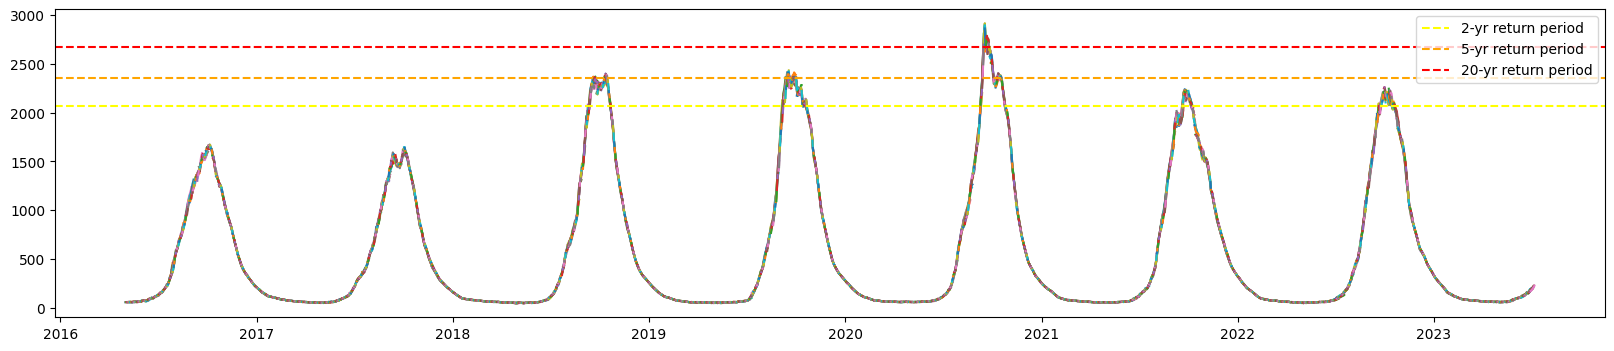

In [119]:
issue_time_start_date = '2016-05-01'
issue_time_end_date = '2024-10-30'

analyse.plot_reforecast(issue_time_start_date, issue_time_end_date,
                        ds_reforecast_1120641660, ds_return_ps_1120641660)

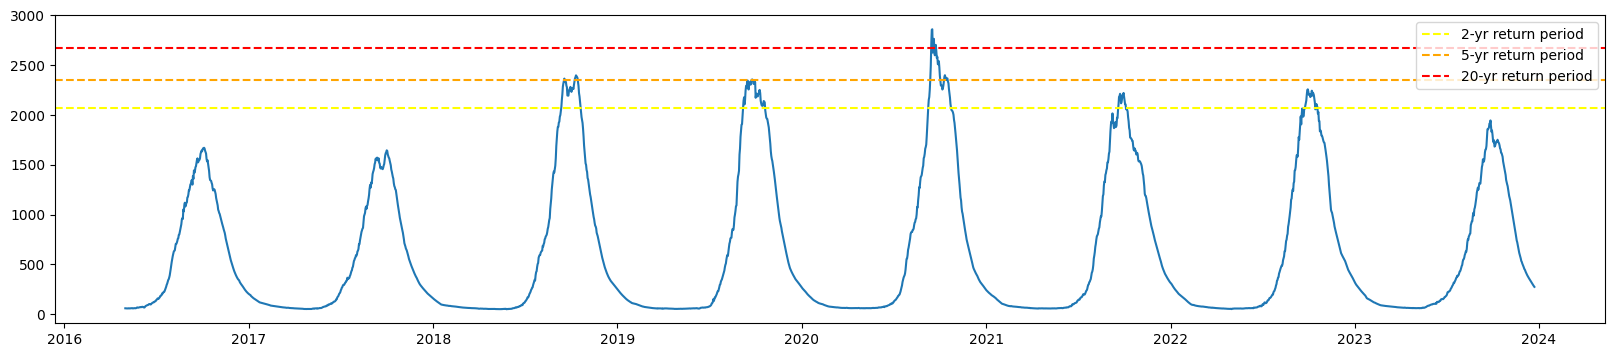

In [120]:
issue_time_start_date = '2016-05-01'
issue_time_end_date = '2024-10-30'

analyse.plot_reanalysis(issue_time_start_date, issue_time_end_date,
                        ds_reanalysis_1120641660, ds_return_ps_1120641660)

In [121]:
# # Plot all reanalysis data for Mali, 2016 - 2024:
# issue_time_start_date = '2016-05-01'
# issue_time_end_date = '2024-10-30'

# for hybas_id in dict_ds_data_Mali.keys():
#     ds_reanalysis = dict_ds_data_Mali[hybas_id]['reanalysis']
#     ds_return_ps = dict_ds_data_Mali[hybas_id]['return_periods']

#     analyse.plot_reanalysis(issue_time_start_date, issue_time_end_date,
#                             ds_reanalysis, ds_return_ps)

In [122]:
# # Plot all reforecast data for Mali, 2016 - 2024:
# issue_time_start_date = '2016-05-01'
# issue_time_end_date = '2024-10-30'

# for hybas_id in dict_ds_data_Mali.keys():
#     ds_reforecast = dict_ds_data_Mali[hybas_id]['reforecast']
#     ds_return_ps = dict_ds_data_Mali[hybas_id]['return_periods']

#     analyse.plot_reforecast(issue_time_start_date, issue_time_end_date,
#                             ds_reforecast, ds_return_ps)

##### **Create flood events**

We take all available (re)forecast data for a gauge, and loop through it to create "flood events"; periods of consecutive flooding in an administrative unit. A flood event is "triggered" once the maximum 7-day lead time predicted discharge in an administrative unit surpasses the 5-yr return period threshold. To come to a list of flood events, we'll:
- define a function that takes classifies data into an administrative unit
- define a function that takes all gauges in an administrative unit and returns the aggregated maximum (or another statistic) of the unit
- define a function that, given a timeseries of (maximum) forecast values, creates flood events

In [123]:
type(ds_reforecast_1120641660)
ds_reforecast_1120641660

<xarray.Dataset>
Dimensions:     (issue_time: 2738, lead_time: 8)
Coordinates:
  * issue_time  (issue_time) datetime64[ns] 2016-01-01 2016-01-02 ... 2023-06-30
    gauge_id    object ...
  * lead_time   (lead_time) timedelta64[ns] 0 days 1 days ... 6 days 7 days
Data variables:
    streamflow  (issue_time, lead_time) float32 ...

In [ ]:
# initialise all reforecast and return periods datasets available for Mali
# by making a dictionary with the hybas ID as the key

In [124]:
# To automate the classification of the gauges into administrative units,
# we first need to add coordinates to of every gauge dataset
from typing import Dict
import pandas as pd
import xarray as xr


def get_country_gauge_coords(country: str) -> pd.DataFrame:
    """
    Get the coordinates of the gauges in a country, stored in data/ folder

    :param country: name of the country
    :return: DataFrame with the gaugeId, latitude and longitude
    """
    if country[0].islower():
        country = country.capitalize()
    return pd.read_csv(f'../data/processed/gauge_coords/{country}_gauge_coords.csv',
                       index_col = None, sep = ';', decimal = '.')


def assign_coords_to_datasets(
        datasets: Dict[str, xr.Dataset], country: str
    ) -> xr.Dataset:
    """
    Takes a dict of datasets and assigns their coordinates, which it gets
    from get_country_gauge_coords(), and assigns it to each dataset. The
    dict contains the names of the datasets as keys and the datasets as values

    :param datasets: dict of datasets
    :param country: name of the country
    :return: dict of datasets with coordinates
    """
    df_coords = get_country_gauge_coords(country)

    for gauge_id, dataset in datasets.items():
        # assumes full name, e.g. 'hybas_1120661040', in df_coords, thus creating
        # a comparison of solely the hybas numbers, not the full name or dataset identifier
        coords = df_coords[
            df_coords['gaugeId'].apply(lambda x: x.split('_')[-1]) == gauge_id.split('_')[-1]
        ]

        if not coords.empty:
            # add the coordinates to the dataset as attributes
            dataset.attrs['latitude'] = coords['latitude'].values[0]
            dataset.attrs['longitude'] = coords['longitude'].values[0]
            # add the hybas_id to the dataset as well (e.g. '1120661040')
            dataset.attrs['gauge_id'] = gauge_id.split('_')[-1]
        else:
            print(f'No coordinates found for gauge {gauge_id}') 

    return datasets

In [125]:
# create the dictionary with dataset names as keys and the datasets as values
dict_datasets = {name: value for name, value in globals().items() if name.startswith('ds_reforecast_')}
print(dict_datasets)

{'ds_reforecast_1120641660': <xarray.Dataset>
Dimensions:     (issue_time: 2738, lead_time: 8)
Coordinates:
  * issue_time  (issue_time) datetime64[ns] 2016-01-01 2016-01-02 ... 2023-06-30
    gauge_id    object ...
  * lead_time   (lead_time) timedelta64[ns] 0 days 1 days ... 6 days 7 days
Data variables:
    streamflow  (issue_time, lead_time) float32 ...}


In [126]:
dict_datasets = assign_coords_to_datasets(dict_datasets, 'Mali')

In [127]:
print(dict_datasets)

{'ds_reforecast_1120641660': <xarray.Dataset>
Dimensions:     (issue_time: 2738, lead_time: 8)
Coordinates:
  * issue_time  (issue_time) datetime64[ns] 2016-01-01 2016-01-02 ... 2023-06-30
    gauge_id    object ...
  * lead_time   (lead_time) timedelta64[ns] 0 days 1 days ... 6 days 7 days
Data variables:
    streamflow  (issue_time, lead_time) float32 ...
Attributes:
    latitude:   14.506249999999
    longitude:  -4.206250000002797
    gauge_id:   1120641660}


In [128]:
# With the coordinates added, we can classify the gauges into administrative units
import geopandas as gpd

# Path to the shape file with admin level 2 units for Mali
path_Mali_shp_adm2 = 'mali_ALL/mli_adm_ab_shp/mli_admbnda_adm2_1m_gov_20211220.shp'
# Read the shape file into a GeoDataFrame and convert it to WGS84
# (which is the coordinate system used by the gauge data)
gpd_adm_units_Mali = analyse.get_shape_file(path_Mali_shp_adm2).to_crs('EPSG:4326')
print(type(gpd_adm_units_Mali)) # Should be a GeoDataFrame

<class 'geopandas.geodataframe.GeoDataFrame'>


In [129]:
def create_coords_df_from_ds(ds: xr.Dataset) -> pd.DataFrame:
    """
    Create a DataFrame with the coordinates of a dataset

    :param ds: xarray Dataset
    :return: DataFrame with the coordinates
    """
    return pd.DataFrame({ 
        'gauge_id': [ds.attrs['gauge_id']],
        'latitude': [ds.attrs['latitude']],
        'longitude': [ds.attrs['longitude']]
    })


# Create a GeoDataFrame from the dataset coordinates;
# geometry is a point for each gauge, with coords (x, y)
gpd_Mali_gauge_coords = gpd.GeoDataFrame(
    create_coords_df_from_ds(ds_reforecast_1120641660),
    geometry = gpd.points_from_xy(
        create_coords_df_from_ds(ds_reforecast_1120641660)['longitude'],
        create_coords_df_from_ds(ds_reforecast_1120641660)['latitude']
    ),
    crs = 'EPSG:4326'
)

# Check if the coord systems are the same
if gpd_adm_units_Mali.crs != gpd_Mali_gauge_coords.crs:
    gpd_adm_units_Mal = gpd_adm_units_Mali.to_crs(gpd_Mali_gauge_coords.crs)
analyse.assert_same_coord_system(gpd_adm_units_Mali, gpd_Mali_gauge_coords)

# Now we can classify the gauges into the administrative units:
# creating a joined dataframe with the gauges as basis, meaning
# that gauges get assigned to the admin unit they are within,
# including their metadata (such as the shape of the admin unit).
# (And, thus, the rest of the admin units are not considered.)
gpd_gauges_classified = gpd.sjoin(
    gpd_Mali_gauge_coords, gpd_adm_units_Mali,
    how = 'left',           # joins left, i.e. the gauges serve as basis
    predicate = 'within',   # checks if the gauge is within the admin unit
    lsuffix = 'gauge', rsuffix = 'adm'
)
print(gpd_gauges_classified.head(1))

# Lastly, we add the admin unit names to the datasets
for idx, row in gpd_gauges_classified.iterrows():
    gauge_id = row['gauge_id']
    admin_unit = row['ADM2_PCODE']
    dict_datasets[f'ds_reforecast_{gauge_id}'].attrs['admin_unit'] = admin_unit

# Check result:
print('\n\n', dict_datasets['ds_reforecast_1120641660'])

     gauge_id  latitude  longitude                   geometry  index_adm  \
0  1120641660  14.50625   -4.20625  POINT (-4.20625 14.50625)         33   

   Shape_Leng  Shape_Area ADM2_FR ADM2_PCODE ADM2_REF ADM2ALT1FR ADM2ALT2FR  \
0    5.438311    0.611429   Mopti     ML0506     None       None       None   

  ADM1_FR ADM1_PCODE    ADM0_FR ADM0_PCODE       date    validOn     validTo  
0   Mopti       ML05  Mali (le)         ML 2015-06-01 2021-12-20  0000/00/00  


 <xarray.Dataset>
Dimensions:     (issue_time: 2738, lead_time: 8)
Coordinates:
  * issue_time  (issue_time) datetime64[ns] 2016-01-01 2016-01-02 ... 2023-06-30
    gauge_id    object ...
  * lead_time   (lead_time) timedelta64[ns] 0 days 1 days ... 6 days 7 days
Data variables:
    streamflow  (issue_time, lead_time) float32 ...
Attributes:
    latitude:    14.506249999999
    longitude:   -4.206250000002797
    gauge_id:    1120641660
    admin_unit:  ML0506


Administrative units in Mali: 53
Administrative units with a gauge: 1


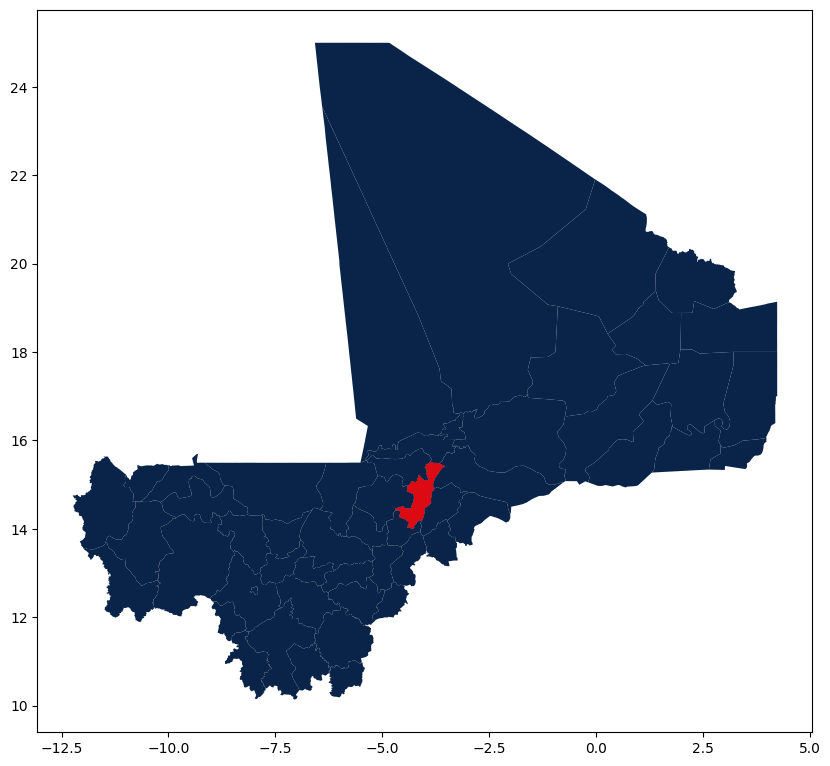

In [130]:
# A quick intermediary plot to see which admin units are contained in the datasets:
# We want to make a plot where each administrative unit with a gauge gets a tinted
# colour. Thus, we now join the GeoDataFrames the other way around
gpd_adm_units_with_gauges = gpd.sjoin(
    gpd_adm_units_Mali, gpd_Mali_gauge_coords,
    how = 'left',
    predicate = 'contains',
    lsuffix = 'adm', rsuffix = 'gauge'
)
print('Administrative units in Mali:', len(gpd_adm_units_Mali))
# Drop the column where index_gauge (aka index_right) is NaN,
# because that means that the admin unit does not contain a gauge
gpd_adm_units_with_gauges = gpd_adm_units_with_gauges.dropna(subset = ['index_gauge'])
# 15 gauges left, so there's one administrative unit with two gauges
print('Administrative units with a gauge:', len(gpd_adm_units_with_gauges))

# Plot using 510 colours
import matplotlib.pyplot as plt
red, blue = '#DB0A13', '#092448'
fig, ax = plt.subplots(figsize = (10, 10))
gpd_adm_units_Mali.plot(ax = ax, color = blue)
gpd_adm_units_with_gauges.plot(ax = ax, color = red)
plt.show()

In [137]:
# With the datasets classified into admin units, we will now aggregate
# the data per admin unit and create a  dataset with just the maximum value of
# the reforecast data at each possible timestep available in the datasets for
# each admin units (resulting in one dataset per admin unit)
#! Continue from here. After this create events using the return periods.
#! Then, match those with impact data.
def create_admin_unit_set(dict_ds: Dict[str, xr.Dataset]) -> set:
    """
    Create a unique set of the admin units in the datasets

    :param dict_ds: dict of datasets
    :return: set of admin units
    """
    admin_units = set()
    for ds in dict_ds.values():
        if 'admin_unit' in ds.attrs:
            admin_units.add(ds.attrs['admin_unit'])
        else:
            raise ValueError('No admin unit found in dataset')
    return admin_units


def subset_lead_time(ds: xr.Dataset, lt: int) -> xr.Dataset:
    """
    Subset the dataset to a certain lead time

    :param ds: xarray Dataset
    :param lt: lead time to subset to
    :return: xarray Dataset with subsetted lead time
    """
    if lt < 0 or lt > 7:
        raise ValueError('Lead time must be between 0 and 7 days')
    return ds.sel(lead_time = pd.Timedelta(days = lt))


def assign_actual_dates_to_dataset(ds: xr.Dataset) -> xr.Dataset:
    """
    Assign the actual dates to the dataset as new coordinates

    :param ds: xarray Dataset
    :return: xarray Dataset with actual dates as coordinates
    """
    actual_dates = ds['issue_time'] + ds['lead_time']
    return ds.assign_coords(actual_date = ('issue_time', actual_dates.data))


def aggregate_per_admin_unit(
        dict_datasets: Dict[str, xr.Dataset],
        lead_time: int = 7,
        method: str = 'max'
    ) -> Dict[str, xr.Dataset]:
    """
    Aggregate the data per administrative unit with a method
    of choice, defaulting to 'max'; more options to be added later.
    With lead time, the forecast horizon can be subsetted

    :param dict_datasets: dict of datasets
    :param lead_time: lead time of the forecast to aggregate
    :param method: method of aggregation
    :return: dict of datasets with aggregated data
    """
    # create a unique set of admin units
    admin_units = create_admin_unit_set(dict_datasets)
    dict_datasets_aggregated = {}

    # for every admin unit: (1) create a list of datasets for that unit;
    for admin_unit in admin_units:
        datasets_admin_unit = [
            ds for ds in dict_datasets.values() if \
                ds.attrs.get('admin_unit') == admin_unit
        ]
        # (2) concatenate the datasets into one dataset and add gauge_id dimension;
        # (3) filter by lead time, discarding the other lead times; (4) assign the
        # actual dates to the dataset, a.k.a. the date at which the forecast actually
        # applies to; (5) aggregate the data by 'actual date' and calculate with 'method'
        ds_combined = xr.concat(datasets_admin_unit, dim = 'gauge_id')
        ds_combined_subset = subset_lead_time(ds_combined, lead_time)
        ds_combined_actual_dates = assign_actual_dates_to_dataset(ds_combined_subset)
        
        if method == 'max':
            dict_datasets_aggregated[admin_unit] = \
                ds_combined_actual_dates.groupby('actual_date').max(dim = 'gauge_id')
        elif method == 'mean':
            dict_datasets_aggregated[admin_unit] = \
                ds_combined_actual_dates.groupby('actual_date').mean(dim = 'gauge_id')
        else:
            raise ValueError('Method parameter not recognised')
        
    return dict_datasets_aggregated

In [138]:
aggregate_per_admin_unit(dict_datasets)

{'ML0506': <xarray.Dataset>
 Dimensions:      (issue_time: 2738)
 Coordinates:
   * issue_time   (issue_time) datetime64[ns] 2016-01-01 ... 2023-06-30
     lead_time    timedelta64[ns] 7 days
     actual_date  (issue_time) datetime64[ns] 2016-01-08 ... 2023-07-07
 Data variables:
     streamflow   (issue_time) float32 298.7 299.2 291.1 ... 206.8 227.1 227.5
 Attributes:
     latitude:    14.506249999999
     longitude:   -4.206250000002797
     gauge_id:    1120641660
     admin_unit:  ML0506}

In [ ]:
# some testing printing statements
ds_subset = ds_reforecast_1120641660.sel(lead_time = pd.Timedelta(days = 7))
print(ds_subset['issue_time'])
print(ds_subset['lead_time'])
print()
print(ds_subset['issue_time'] + ds_subset['lead_time'])
ds_actual_dates = ds_subset.assign_coords(
    actual_date = ('issue_time', (ds_subset['issue_time'] + \
                                  ds_subset['lead_time']).data)
)
print(ds_actual_dates)

<xarray.DataArray 'issue_time' (issue_time: 2738)>
array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', ..., '2023-06-28T00:00:00.000000000',
       '2023-06-29T00:00:00.000000000', '2023-06-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * issue_time  (issue_time) datetime64[ns] 2016-01-01 2016-01-02 ... 2023-06-30
    gauge_id    object ...
    lead_time   timedelta64[ns] 7 days
<xarray.DataArray 'lead_time' ()>
array(604800000000000, dtype='timedelta64[ns]')
Coordinates:
    gauge_id   object ...
    lead_time  timedelta64[ns] 7 days

<xarray.DataArray (issue_time: 2738)>
array(['2016-01-08T00:00:00.000000000', '2016-01-09T00:00:00.000000000',
       '2016-01-10T00:00:00.000000000', ...,
       '2023-07-05T00:00:00.000000000', '2023-07-06T00:00:00.000000000',
       '2023-07-07T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * issue_time  (issue_time) datetime64[ns] 2016-01-01 2016-01-02 .